In [1]:
from skimage import io, transform
import tensorflow as tf
import numpy as np

In [2]:
# model
lenet_model = tf.keras.models.load_model('lenet-model.h5')
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
re_lu (ReLU)                 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
re_lu_1 (ReLU)               (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         4

In [3]:
def showImg(img):
    io.imshow(img)
    io.show()

In [4]:
def preprocess(x):
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [-1, 32, 32, 3])
    return x

In [5]:
def generateDb(x):
    train_db = tf.data.Dataset.from_tensor_slices(x)
    train_db = train_db.batch(128)
    train_db = train_db.map(preprocess)
    return train_db

In [9]:
def visualize(input_image):
    # resize input image
    input_image = transform.resize(input_image,(520,520))[:,:,:3]
    # crop images to patches
    delta = 20
    results = []
    for i in range(26):
        for j in range(26):
            cropped = input_image[i*delta:(i+1)*delta,j*delta:(j+1)*delta,:]
            results.append(cropped)
#             showImg(cropped)
            


    patches = np.stack(results,axis=0)

    # 样本图像周围补0（上下左右均补6个0），将20*20的图像转成32*32的图像
    paddings = tf.constant([[0, 0], [6, 6], [6, 6], [0, 0]])
    patches = tf.pad(patches,paddings)

    # preprocessing
    db = generateDb(patches)
    
    

    c=lenet_model.predict(db,32,verbose =2)
    print(len(c))
    print(c[0])
    print(np.argmax(c[0]))

    tmp = [np.argmax(c[i]) for i in range(len(c))]
    tmp_np = np.array(tmp).reshape((26,26))
    print(tmp_np)

6/6 - 0s
676
[1.7324165e-01 8.2620484e-01 5.5349816e-04]
1
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 

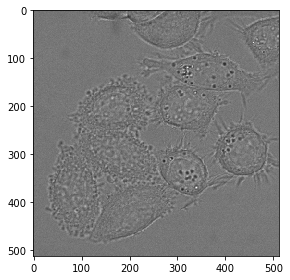

In [10]:
input_image = io.imread('input images/1.png')
visualize(input_image)
io.imshow(input_image)
io.show()